## Poisson Spike Generators

Poisson spike generators are used in neuroscience to simulate neurons' spiking activity since a Poisson process’s stationarity, independence, and memoryless properties closely align with cortical neurons' irregular firing. Biological neurons fire action potentials probabilistically, with individual spikes occurring independently. The same stimulus elicits different patterns of spiking activity from the same neuron across trials. Despite its simplicity and limitations, a Poisson model provides a good approximation to mimic this stochastic firing pattern. It is utilized by researchers to understand the complexities of neural code, develop more accurate models and algorithms, and develop neural prosthetics and BCIs.

**Poisson Process**
is a model of random points(events) occurring randomly, independent of each other in continuous time, where the average time between successive events is known.

  - These events are widely observed in the natural world, such as the times of earthquakes and customers' arrivals at a store; for example, customers' arrivals at a store might have a certain hourly or daily rate, but since the arrival of one customer doesn’t affect the probability of the next customer’s arrival, this stochastic point process is termed a Poisson point process.

  - Only one piece of information, the rate of occurrence of events, is required to simulate a Poisson process.
    - For example, according to the USGS, about 55 earthquakes occur every day around the world, totaling 20,000 annual independent events.
    $$ 
      \text{Time between earthquakes} = \frac{\text{Total minutes in a year}}{\text{Number of earthquakes}} = \frac{525,600}{20,000} = 26.28 \text{minutes}  
    $$

    - Knowing an earthquake(Poisson event) occurs every 26 minutes, lets us define the only parameter needed to completely describe the Poisson process $ \lambda = \frac{1}{26} $

  - Using the neuron firing rate (rate parameter) we can use the Poisson distribution to determine:
    - Probability of a given number of spikes in a time interval.
    - Probability of waiting time until the next spike.
    - Simulate spikes.  

The Homogeneous Poisson-Process Assumptions:
   - The number of arrivals in non-overlapping intervals of a Poisson process are independent. After each arrival point, the process restarts independently of the past.
   - A Poisson process has stationary increments.
   - Events occur with a constant average rate $\lambda$.
   - Two events cannot occur simultaneously.

Properties of a Poisson Process.

  - IID
  - ..
  - .

### Limitations of the Poisson Model for modeling

   - The **absolute refractory period**, where the neuron cannot fire a spike for a few milliseconds following an action potential, and the **relative refractory period**, where the chances of an action potential are reduced, violate the independent spike hypothesis. 
   - The Poisson model cannot describe the neurons' burst, cluster firing pattern.

Biological neurons cannot be truly Poisson because of the refractory period; however, despite these limitations, the properties of the Poisson process make it a good option for many modeling approaches.


### Spike Train

Action potentials are electrical pulses traveling through the nerve fibres and are the basic currency of information transfer in the nervous system. Neurons propagate information through the nerves by firing these action potentials or spikes in various patterns characterized by the rate of firing. These spikes can be recorded through multiple intracellular and extracellular methods.
  - The spikes are considered to be stereotyped events. That is, the peak voltage of every spike generated in the body is considered the same, and all the information is contained in the rate of firing of these spikes.
  - Computationally, a spike train is represented as a Boolean vector.


### Representation of Spike-Train Data

  - Poisson spiking models represent spike-train as a sum of discrete idealized impulses in the form of Dirac $\delta$ functions, characterizing a neuron firing instantaneously with perfect temporal precision. If a neuron fires spikes at times $t_1, t_2, \dots t_n$ , the spike train can be expressed as:

$$
\rho(t) = \sum_{i=1}^k \delta(t - t_i)
$$
where:</br>
$\rho(t)$ : Neural Response function modeled as a $\delta$ function.</br>
$\delta(t - t_i)$ : $\delta$ function centered at $t_i$ </br>
$t$ : current time. </br>
$t_i $: times of $k$ spikes. </br>
Unit impulse signal: 


$$
\delta(t) =
\begin{cases} 
0, & t \neq 0, \\
\infty, & t = 0
\end{cases}, \quad \text{with } \int_{-\infty}^\infty \delta(t) \, dt = 1
$$

   - $\delta$ function is a generalized function, or a distribution used to model instantaneous events such as a hammer strike. The Dirac $\delta$ function approaches zero everywhere except where its argument is zero, there the function tends towards infinity to maintain the requirement of unit area in the limit.</br>
   - The integral evaluates to 1 only when the limits of integration surround the time of event.
   
$$
\int_{a}^{b} \delta(t) \, dt =
\begin{cases}
1, & \text{if } 0 \in [a, b], \\
0, & \text{if } 0 \notin [a, b].
\end{cases}
$$


   - *Sifting Property*: The delta function samples precise values from our continuous input function at specific instances. This allows us to isolate the contributions of the individual spikes into a meaningful representation in continuous time.   
   $$
   \int_{-\infty}^\infty f(t) \delta(t - t_0) \, dt = f(t_0)
   $$ 

   - The delta function is used in theoretical models where the precise timing of spikes is important rather than the true dynamics of the response. The spikes generated are idealized representations since neuronal responses are not instantaneous.  

  - In non-theoretical or experimental scenarios requiring biological realism where spikes have a finite width, instead of the delta function, kernel functions like the Gaussian, alpha, and triangular are used. The limiting form of these functions approximates the spike times and then decays gradually, approaching zero as we move away from the spike time.

### Probability of Spikes

  Since continuous random variables have zero point probabilities, the probability of a spike occurring at a specific time is always zero. Therefore, the probability density of spikes within small time intervals is instead considered. </br>
  These small time intervals (time bins) are assumed to be wide enough to accommodate only a single spike. Each bin can either have a spike or no spike, so the probability of a neuron firing more than one spike in a time bin is negligible.
  - The width of each bin is given by $\Delta$ t.
  - **Probability(P[])** for a **sequence of n discrete events** such as the occurrence of spikes in a trial of length T, is given by P[event 1, event 2, ..., event n] where the probability of each of these events is a number between 0 and 1 (inclusive) quantifying the likelihood of the occurrence of a spike.  
  - **Probability Density (p[])** of a continuous random variable z taking on a value between z and z + dz (for a small dz) is given by **p[z]dz**, where p[z] is the probability density. The probability of the variable in the interval can be obtained by integrating the probability density function over the interval $\int_{t}^{t+\Delta t}$ $p[z]$ $dz $  </br> 
  The probability of seeing a spike in any of these $\Delta$ t intervals equals the single spike probability density $p[t]$ times the width of the interval $\Delta$ t.
    Therefore, the spike sequence's probability is proportional to the probability density of the spike times. However, since spike sequences are large, we can use the probability density function of the Poisson distribution (discussed later), which gives us the probability of generating $n$ spikes without the need to calculate these probabilities individually for each event.
  - The single spike probability density gives the likelihood of the spike in an infinitesimal interval. It is therefore also equal to the neuron's **Instantaneous firing rate**, denoted by $r(t)$. In this notebook, the instantaneous rate is represented by $\lambda$(t).


### Instantaneous Firing Rate of a Neuron

  - The instantaneous firing rate $r(t)$ is a continuous function and gives the neuron's firing probability in a small interval [t, t + $\Delta$ t]. It can be calculated by counting the spikes in an interval and taking the limit as the small time interval approaches zero
$$
r(t) = \lim_{\Delta t \to 0} \frac{N_{\Delta t}}{\Delta t}.
$$

  - The instantaneous firing rate \(r(t)\) gives the spike activity at a very fine temporal resolution and shows how the spiking activity evolves over time.
  - The instantaneous firing rate is also defined as the **expectation of the Neural Response Function** $\langle \rho(t) \rangle$, averaged over an infinite (large) number of trials with the same stimulus.

      - The neural response function maps the relationship between a stimulus (light intensity, sound frequency, etc.) and the response (firing rate) of a neuron or a population of neurons. By modeling this relationship, we can quantify how strongly a stimulus elicits responses in a neuron over a period of time.
      - Averaging the neural response function across trials generates contributions proportional to the fraction of trials on which a spike occurred. This removes random variations across trials and gives a smooth measure of the neural activity correlated with the stimulus.</br>

  - **Sliding-Window**: An estimate of the instantaneous firing rate for a single trial can be computed by taking a bin(window/kernel) of size(duration)        $\Delta$ t and sliding it along the spike-train, summing the spikes in the window at times $t_i$ ($i = 1, 2, \dots, n\ $).

    - - $r_{approx}(t) = \sum_{i=1}^{n} w(t - t_i)$
    </br>where $w(t)$ is the window function. 
    
    For a rectangular window of width $\Delta t$:

    
      $w(t) = \begin{cases} 1/\Delta t & \text{if } -\Delta t/2 \leq t < \Delta t/2 \\ 0 & \text{otherwise} \end{cases}$

      - **Linear-filters**:
      The instantaneous rate can also be approximated for a single trial by convolving a window function (Gaussian, alpha, rectangular) with the spike-train. 
  
          $r_{approx}(t) = \int_{-\infty}^{\infty} d\tau w(\tau)\rho(t - \tau) $
  
        -  $w(\tau)$ is a window function which specifies how the neural response function contributes to the estimated firing rateat spike times. Different window functions are used depending on the requirement to obtain smooth,causal firing-rate approximations.

  - **Inverse of the Interspike Interval**
      : ISI is the time between two consecutive spikes; the inverse of ISI, $\frac{1}{ISI}$, is often used as a practical approximation of the firing rate in experimental contexts since the distance between spikes is an easy quantity to determine when data is scarce. However, this method isn't used in the case of irregular firing, where the ISI isn't constant.    





The instantaneous firing rate $r(t)$ is a highly reduced quantity, and there is no unique way to approximate this rate. Conventionally, there are multiple ways of representing the firing rate, each with its advantages and disadvantages:  

- **Spike Count rate r**: Obtained by counting the number of spikes in a trial divided by the duration of the trial.
        
  $r$ = $\frac{N_{\text{spikes}}}{T}$ = $\frac{1}{T} \int_{0}^T d\tau \rho(t) $

  Spike Count Rate is equivalent to the time average of the neural response function over the duration of the trial.      
    - Expressed in Hz. Easy to compute but the temporal information of spikes is lost.

- **Spike-Density** $\langle r \rangle $ : Just like we averaged the neural response function across trials to get the instantaneous rate, we can also average the spike count rate across trials to account for cross-trial variability and to check the temporal pattern over multiple trials.</br>
        $\langle r \rangle $ = $\frac{\langle n \rangle}{T} $ = $\frac{1}{T} \int_{0}^T  r(t) dt $  </br>
      
  - equivalent to the time average of the instantaneous rate $r(t)$ and the spike-count rate $r$ trial average.
  - Neuronal activity decreases when it is exposed to repeated stimuli.
  - The spike density written as a function of stimulus is called the **neural response tuning curve.** A tuning curve is a plot showing the relationship between neural activity (firing rate) and a particular stimulus feature (orientation).

Population density: This method involves recording from a population of neurons that respond to the same stimuli using electrode arrays.
  Each neuron's response is measured over a single trial, and a population-wise average is taken to get a population measure. 
  - Temporal information is not lost since we're not averaging over time, however,
    - This method doesn't provide information about individual neurons, so if neurons in a population have different behavior, it won't appear in the network-level response.
    
  
$$
r_{\text{pop}}(t) = \frac{1}{N_{\text{neurons}}} \sum_{j=1}^{N_{\text{neurons}}} r_j(t)
$$
where $r_j(t)$ is the firing rate of neuron $j$.



## Homogeneous Poisson Proces
When the firing rate remains constant, the sub-events of a Poisson process have the same probability of occurrence. For the context of spike generation, these sub-events can be considered coin tosses. 
   - ### Representing spikes as Bernoulli trials
 
     - Since each of the time bins can only have either of the two possible values: Spike or No-Spike, the spikes obtained can be considered an outcome of independent bernoulli trials where $ p \in [0,1]$ is the success parameter of the process. q denotes no-spike.
     - Bernoulli trials process has the same renewal property as a Poisson process since the trials are independent, at each of the discrete arrival times, the process starts over independently of the past spike's generation.
     - Let's say there are $n$ of these time bins and T is the total time of stimulus presentation in a single trial, then width of each of these subintervals: $\Delta$ t = $\frac{T}{n} $.
     - The probability that we see $k$ spikes in these $n$ time-bins is given by the probability mass function of the binomial distribution, consisting of 3 quantities :
       - Probability that there are $k$ spikes in the $n$ time-bins: $p^k $ </br> which can be written as  $(\lambda \Delta t)^k\ $.
       - Probability of no-spikes in the remaining time-bins: $q^{n-k} $ </br> which can be written as (1 - $\lambda \Delta t)^{n-k} $.
       - Number of ways to arrange $k$ spikes in $n$ time bins when order of bins isn't important:       $\binom{n}{k} $. </br>
</br>where: 
         - p : probability of success(spike) in a bin.
         - q : probability of no-spike in a bin,
         - k : total spikes observed
         - n :total time-bins.
         - $\binom{n}{k}  = \frac{n!}{k! \cdot (n-k)!} $ is the binomial coefficient.
         - $p$ + $q$ = 1
         - $k$= 0,1,2,3 ....$n$
         
   - Probability of k spikes occuring in n subintervals is given by this binomial probability distribution:
$$
P(k; \lambda) = \binom{n}{k} (\lambda \Delta t)^k (1 - \lambda \Delta t)^{n-k}
$$      

   - *Average number of spikes* : Since mean of the binomial distribution is $\mu_{\text{binomial}} = n \cdot p  $ </br>
therefore the expected number of spikes is the product of:  
     - Number of time-bins * the Probability of a spike in a time bin.

   - *Variance in the number of spikes* : $\sigma^2_{\text{binomial}} = n \cdot p \cdot (1 - p) $ 

   




### Poisson distribution as a limiting case of Binomial distribution

   - We've already established that rate is the probability per unit time.
$$
r(t) = \lim_{\Delta t \to 0} \frac{P(\text{spike in } [t, t+\Delta t])}{\Delta t}
$$
   - If the rate parameter stays finite, the probability in the bin becomes smaller and smaller as the size of the bin gets smaller.
   
     - In the limit that there are many time-bins $n \to \infty $ and the probability of success becomes very small as the Bernoulli trials get faster and faster $\Delta t \to 0 $, the binomial distribution with parameters n and $p_n$ converges to the Poisson distribution with parameter $\lambda$.

$$
P(k; \lambda) = \lim_{n \to \infty} \binom{n}{k} \left(\frac{\lambda T}{n}\right)^k \left(1 - \frac{\lambda T}{n}\right)^{n-k}
$$
   - Substituting $\Delta$ t = $\frac{T}{n} $. Using the approximation $(1 - x)^n \approx e^{-nx} $ for large $n$.     

 
$$ 
  P(k; \lambda) = \frac{e^{-\lambda T} (\lambda T)^k}{k!}
$$

We get the formula for the  *Probability Density Function of the Poisson Distribution* with rate parameter $\lambda$. 

   - This gives us the probability of seeing $k$ spikes in a single trial of duration $T$ as in the binomial case but the advantage now is we don't need to determine p for every trial. The Poisson distribution just requires one parameter $\lambda which is the single product of n and p   .
     - The mean and variance of the binomial distribution also converge to the mean and variance of the limiting Poisson distribution.</br>$\mu_{\text{binomial}} = n \cdot p  $  
     </br>As $ n \to \infty $ and $p \to 0 $ such that $n \cdot p = \lambda $ </br> we get, </br> $\mu_{\text{binomial}} = n \cdot p \to \lambda = \mu_{\text{poisson}} $ </br>
     - and as $np^2 $ becomes very small in $\sigma^2_{\text{binomial}} = np-np^2 $ </br> $\sigma^2_{\text{poisson}} = np= \lambda $
       - *Fano Factor*: is defined as the variance to mean ratio of spike counts in a time window. The variance and mean being equal is an unusual property and testing if this ratio is 1 is a way to test whether a distribution is Poisson. 



### Interspike Intervals- The Cumulative Distribution Function and Probability Density Function.

Let's consider a Poisson spiking neuron to have an average firing rate of $\lambda$ when a stimulus is presented for t seconds. The probability the neuron fires no spikes in a time-bin $[t_0 , t_0 + \tau$ ] could be computed by plugging in k=0 in the Poisson probability density function derived above:

We get, 

$$
   P(0 \text{ spikes in } [t_0, t_0+\tau]) = e^{-\lambda \tau}
$$

Continuing with our assumption that the bin is large enough to accomodate just 1 spike. The probability that at least one spike occurs in the interval is 1 minus the probability of zero spikes:
   

$$
   P(\text{at least 1 spike in } [t_0, t_0+\tau]) = 1 - e^{-\lambda \tau}
$$

This is the same as the cumulative distribution function of the waiting time in an exponential distribution. Here, the CDF $F(t)=1-e^{-\lambda t} $ gives the probability of the waiting time being at most $\tau$.
  - Looking at the plot below we can see the CDF increases monotonically from 0 to 1 as more time passes, i.e, the probability of seeing a long waiting time exponentially decays to zero, and correspondingly the probability of seeing a spike increases towards one.    
  - 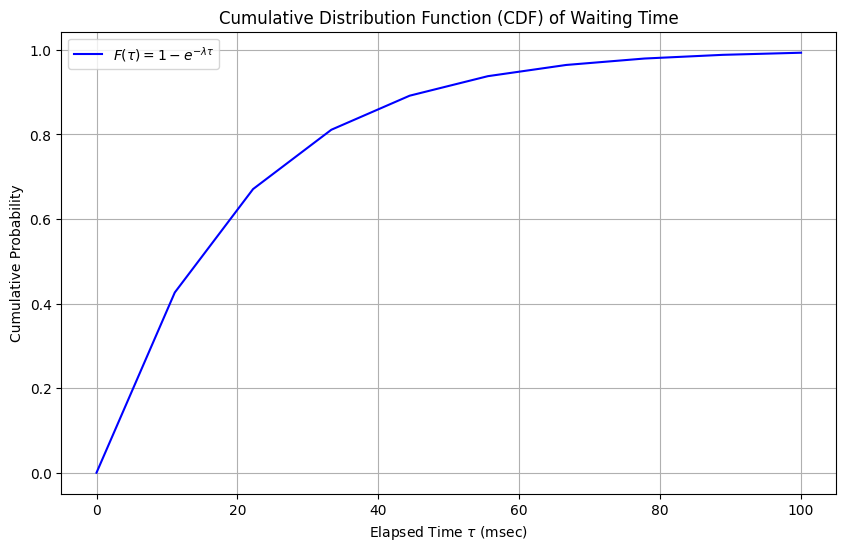

  - Its called cumulative since the CDF accumulates the probability upto the specified value of the random variable. The sum of the likelihoods(CDF) can aso be computed by integrating the PDF of the waiting time.

**PDF from CDF** 
  - By the Fundamental Theorem of Calculus, the PDF is the derivative of the CDF.
$$
f(t)=\frac{d}{dt} F(t) = \frac{d}{dt}\Bigl(1-e^{-\lambda t}\Bigr) = \lambda e^{-\lambda t}, \quad t\ge 0.
$$ 

For a continuous stochastic variable the probability at a specific time is zero, the Probability density function gives us relative likelihoods through the density of probabilities along the curve. $e^{-\lambda t} $ represents an exponential decay, the strong renewal property of Poisson process (sub-events restart independently of the past) alongwith the unique memoryless property (identical distribution) of exponential distributions imply that the waiting times between spikes are exponentially distributed.

  - **Likelihood of specific intervals**:   In  $f(t) = \lambda e^{-\lambda t} $ for $t \geq 0 $, the highest density is at $t = 0$  (the mode), indicating that shorter intervals are more likely in the beginning, as time increases the probability density exponentially decays scaled by $\lambda meaning longer waiting times become less likely. As $t \to \infty $, the exponential term $e^{-\lambda t} $ approaches 0 making the likelihood of very long waiting time close to zero.   

  - **Statistical Properties**: The PDF allows us to compute the moments of distribution.
    - Mean: The mean waiting time between events is given by: 
  $$
    \langle t \rangle  = \int_0^{\infty} t \, f(t) \, dt = \int_0^{\infty} t \, \lambda e^{-\lambda t} \, dt = \frac{1}{\lambda}
  $$
  In a Homogeneous Poisson process, the average firing rate is related to the average ISI by:      $ \langle ISI \rangle = \frac{1}{\lambda} $  
  
  If we have $\frac{1}{\lambda}$ time units between arrivals in a Homogeneous Poisson process, we would expect the average firing rate to be $\lambda$.

  - Variance of the interspike interval:
  $$
  {\sigma_t}^2  = \int_0^{\infty} t^2 \, f(t) \, dt - \langle {t}^2 \rangle = \frac{1}{\lambda^2}
  $$

  Variance is the square of the standard deviation and quantifies the spread of the distribution. A lower variance means a consistent ISI characterized by a regular firing pattern. On the other hand, a higher variance indicates an irregular firing pattern characterized by a varying ISI and a relatively wider distribution.
  
  The variance alongwith the coefficient of variation is an important measure of the *variability in the timing between spikes.*

  - **Coefficient of variation** ($C_v$): is the ratio of the standard deviation to the mean of the ISI of a neuron .  
  $$
  C_v = \frac{\sigma_t}{\mu}
  $$
  The Coefficient of Variation ($C_v$) quantifies the relative spread of the ISI distribution and indicates how well a Poisson Process approximates the   firing pattern.

  - **CV = 1:**
    For a Homogeneous Poisson process, the Coefficient of Variation is exactly 1. A $C_v$ significantly different from one is indicative of a deviation from the stochastic, memoryless behavior of the Poisson process, suggesting the use of a different, perhaps more complex model to capture the firing pattern of the experimental neuron.

    - **CV < 1:**
      This suggests the spike intervals are more regular than in a Poisson process. The reduced $C_v$ could be because of refractory periods, where the likelihood of firing another spike is reduced following the generation of an action potential. This phenomenon reduces the occurrence of very short ISIs, leading to a lower $C_v$.   

    - **CV > 1:**  
      A $C_v$ exceeding 1 suggests the firing is more irregular. The neuron could be firing in short bursts or clusters, increasing the variability in the ISIs.

  - The Coefficient of Variation, being dimensionless, provides a normalized measure for quantifying the relative variance in spike patterns even with varying firing rates across trials, neurons, and experimental conditions. For example, a neuron with a higher firing rate would have a lower ISI. Still, its relative variability could be higher than that of a neuron with a lower firing rate. The Coefficient of Variation makes it possible to examine the relative width even when the average ISIs differ.   

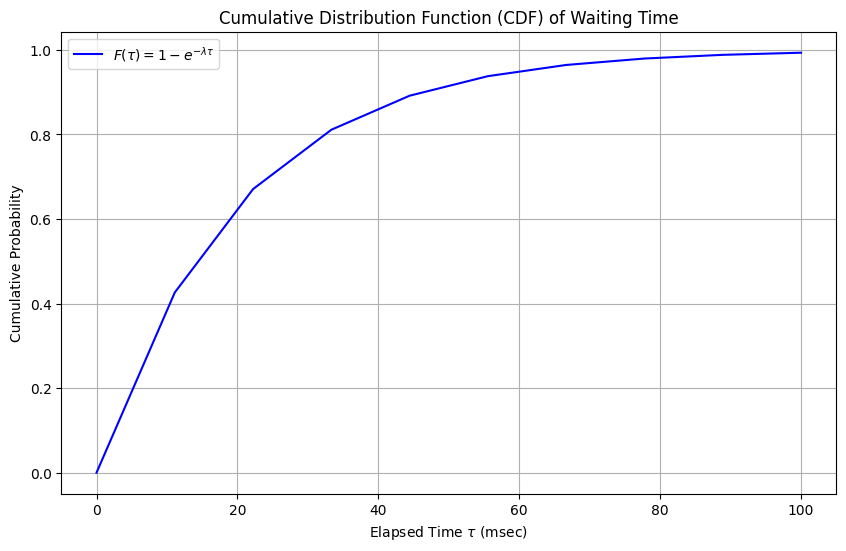

In [48]:
import numpy as np

import matplotlib.pyplot as plt

# Parameters
rate = 0.05 #1/26  # Average firing rate (spikes per msec)

time = np.linspace(0, 100, 10)  # Time interval in milliseconds

# CDF of exponential distribution
cdf = 1 - np.exp(-rate * time)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, cdf, label=r'$F(\tau) = 1 - e^{-\lambda \tau}$', color='blue')
plt.title('Cumulative Distribution Function (CDF) of Waiting Time')
plt.xlabel(r'Elapsed Time $\tau$ (msec)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

## The Inhomogeneous Poisson Process:

The Inhomogeneous Poisson Process can be considered a more realistic approximation of the firing pattern of neurons since biological neurons don’t fire at a constant rate because of varying stimulus and internal states.

  - An Inhomogeneous Poisson Process is the same as the previously discussed Homogeneous case, except that the firing rate is no longer constant. The varying rate causes the probability density to also change in the delta t subintervals making the process inhomogeneous.

  - **Non-Stationarity**: The process is no longer stationary as the statistical properties, such as the mean number of events, change with a varying rate every sub-interval.

  - Spikes are still generated independently of the preceding intervals, however the expected number of spikes are now given by the integrated rate function $\Lambda$(T) which gives an aggregate measure of the neuron's firing despite the non-stationarity of the process.
  $$
  \Lambda(T) = \int_0^T \lambda(t) \, dt.
  $$ 

  Here:

- **$\lambda$(t)** is the instantaneous rate at time **t**.
- **$\Lambda$(T)** is the integrated rate function, also called the intensity function and gives the mean number of spikes up to time $T$
  
- The probability of observing k spikes by time T in an Inhomogeneous Poisson Process is given by:
   $$
   P(N(T) = k) = \frac{[\Lambda(T)]^k e^{-\Lambda(T)}}{k!}
   $$



### Waiting time 
The exponential term is the Survival function and represents the probability of no spikes occuring in the entire time period $T$.

The **cumulative distribution function (CDF)** for the waiting time $T$ is:

$$
F(t) = 1 - \exp\bigl(-\Lambda(t)\bigr)
$$



The **Probability density function (PDF)** is the derivative of CDF:

$$
f(t) = \lambda(t) \exp\bigl(-\Lambda(t)\bigr)
$$

The PDF of the waiting time no longer simplifies to an exponential form unless the rate is constant Therefore, the ISI in an Inhomogeneous Poisson process aren't exponentially distributed but modulated by the time varying rate.  



In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [3]:
with open('cricketcercal_poisson.pickle', 'rb') as f:
    data_poisson = pickle.load(f)

## Dataset Explanation

Crickets have fine hair on their hind legs that are extremely sensitive to air currents. Each hair is connected to a neuron that fires depending on the orientation of the air current direction. Thousands of these sensory neurons send the signal to a set of interneurons that relay this information to the cricket's nervous system. In insects like crickets and cockroaches, four interneurons encode the wind direction.  
The dataset contains firing rates of 4 interneurons of the Cricket cercal system in response to a stimulus of air current of uniform intensity and differing direction. The experiment was repeated 100 times, which corresponds to the 100 rows of the data seen below.

In [4]:
data_poisson

{'neuron4': array([[18.1, 12.1,  6. , ..., 26.7, 25.4, 23.1],
        [17.4, 14.8,  6.7, ..., 27.3, 27. , 25.4],
        [17.6, 14.8,  7.6, ..., 29.4, 26.2, 22.9],
        ...,
        [20.1, 12.8,  7.6, ..., 25.3, 26.5, 24.3],
        [18.1, 12.3,  7.4, ..., 26.3, 27. , 23.9],
        [17.9, 15.3,  6.4, ..., 26.2, 26.8, 25. ]]),
 'stim': array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
        330., 345.]),
 'neuron3': array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]),
 'neuron2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [5]:
print("The shape of the stimulus array is {}".format(data_poisson['stim'].shape))
print("The shape of neuron1 response array is {}".format(data_poisson['neuron1'].shape))
print("The shape of neuron2 response array is {}".format(data_poisson['neuron2'].shape))
print("The shape of neuron3 response array is {}".format(data_poisson['neuron3'].shape))
print("The shape of neuron4 response array is {}".format(data_poisson['neuron4'].shape))

The shape of the stimulus array is (24,)
The shape of neuron1 response array is (100, 24)
The shape of neuron2 response array is (100, 24)
The shape of neuron3 response array is (100, 24)
The shape of neuron4 response array is (100, 24)


In [6]:
def intensity_function(t,trial_firing_rates):
    """
    t: (float)The time at which the intensity function is evaluated.
    trial_firing_rates: The firing rate data of the neuron for the row(single trial).
    This function takes the firing rate of the neuron
    and returns the firing rate of every trial corresponding to the time bin into which t falls.
    """
    #total_trials = len(trial_firing_rates)  # Number of trials
    total_time_points = len(trial_firing_rates)  # Number of time points in each trial
    #total_time_points = 24  # Number of time points in each trial
    stimulus_duration = 10  # Total duration of stimulus presentation in seconds
    bin_width= stimulus_duration / total_time_points  # Width of each time bin in seconds
    bin_index = int(t / bin_width)  # Number of bins in the trial duration
    # Check if the bin index is within the valid range
    if bin_index >= total_time_points:
        bin_index = total_time_points - 1
    
    return trial_firing_rates[bin_index]    
     

In [7]:
def inhomogeneous_poisson_spike_thinning(variable_rates_array, trial_max_rate):
    """
    Use spike-thinning to generate inhomogeneous Poisson spikes based on varying firing rate.
    """
    t= 0
    spike_train=[]
    stimulus_duration = 10 # Total duration of stimulus presentation in seconds
    
    while t < stimulus_duration:
        #exponential_isi_time= np.random.exponential(1 / trial_max_rate, size=None)  # Generates random exponential isi with mean 1/lambda
        u= np.random.rand()  # Generate a random number u from uniform distribution [0,1]
        # Generating candidate spike time using inverse transform sampling
        # The mean of the exponential distribution is 1/lambda, where lambda is the maximum firing rate
        exponential_isi_time= -np.log(u) / trial_max_rate
        t += exponential_isi_time
        
        # Check if the generated time is within the stimulus duration
        if t >= stimulus_duration:
            break
        
        # Spike thinning: Generate a random number and compare it with the normalized firing rate at time t    
        if np.random.rand() < variable_rates_array(t)/trial_max_rate: 
            # If the random number is less than the firing rate, record the spike time
            spike_train.append(t)
    return np.array(spike_train)    

In [8]:
def simulate_trial(neuron_frate_data_row):
    # Compute the maximum firing rate for this trial.
    trial_max_rate = np.max(neuron_frate_data_row)
    
    # Create the rate function for this trial.
    variable_rates_array = partial(intensity_function, trial_firing_rates=neuron_frate_data_row)
    
    # Generate the spike times using thinning.
    spikes = inhomogeneous_poisson_spike_thinning(variable_rates_array, trial_max_rate)
    
    return spikes, trial_max_rate

In [11]:
# List to store spike times for each trial and the corresponding lambda_max values.
neuron1_all_spike_times = []
neuron1_max_rate = []

for trial in data_poisson['neuron1']:
    neuron_frate_data_row = trial  # Firing rates for the current trial
    spikes, lambda_max = simulate_trial(neuron_frate_data_row)
    neuron1_all_spike_times.append(spikes)
    neuron1_max_rate.append(lambda_max)
    
print("Trial 1 spike times:", neuron1_all_spike_times[0])
print("Trial 1 max firing rate:", neuron1_max_rate[0])    

Trial 1 spike times: [0.03792539 0.04670499 0.05271514 0.08201478 0.09313756 0.14295042
 0.15187014 0.19709234 0.22851844 0.26606571 0.26707115 0.28981164
 0.41508295 0.49975512 0.55388062 0.55993373 0.56345044 0.56715303
 0.58119705 0.74542843 0.77244184 0.77468797 0.8233717  0.83926727
 0.87817042 0.92875182 0.93371382 0.97197856 0.98442827 0.99812531
 0.99942734 1.02168151 1.0338673  1.07656027 1.07792249 1.08518077
 1.11249481 1.14842233 1.28783711 1.30451565 1.33654203 1.50044189
 1.50176999 1.58526251 1.60345944 1.61617419 1.62108172 1.62409817
 1.63888928 1.640003   1.6400354  1.7029386  1.73756284 1.74195819
 1.7449859  1.78710354 1.79511864 1.81296962 1.84219838 1.84983902
 1.87470481 1.87823804 1.89250469 1.89812099 1.9599603  1.99358296
 1.99851544 2.02412945 2.14693417 2.16469914 2.20819697 2.21693017
 2.24936232 2.25586113 2.34360873 2.36334554 2.44133048 2.52305516
 2.55548616 2.56635199 2.59243604 2.61937878 2.7985352  2.85459297
 2.91154701 3.02359604 3.10703313 3.12483

In [10]:
len(neuron1_all_spike_times)

100

In [12]:
# List to store spike times for each trial and the corresponding lambda_max values.
neuron2_all_spike_times = []
neuron2_max_rate = []

for trial in data_poisson['neuron2']:
    neuron_frate_data_row = trial  # Firing rates for the current trial
    spikes, lambda_max = simulate_trial(neuron_frate_data_row)
    neuron2_all_spike_times.append(spikes)
    neuron2_max_rate.append(lambda_max)
    
print("Trial 1 spike times of neuron2:", neuron2_all_spike_times[0])
print("Trial 1 max firing rate of neuron2:", neuron2_max_rate[0])    

Trial 1 spike times of neuron2: [2.02709111 2.04017802 2.1880777  2.23999248 2.26749125 2.36354095
 2.47682071 2.50800682 2.62967735 2.86158619 2.88177576 2.94617157
 2.95441745 2.95764872 2.99847072 3.03663357 3.03900265 3.04224348
 3.07026834 3.0712589  3.11164512 3.1662348  3.29800861 3.33035213
 3.39488293 3.40617065 3.56387156 3.5722171  3.61575877 3.62469157
 3.63868756 3.72576696 3.83863877 3.86983172 3.89674028 4.01436768
 4.0281805  4.05986549 4.21122016 4.2208205  4.32110956 4.36465239
 4.55839089 4.57505744 4.61280591 4.65690477 4.72563868 4.76357471
 4.80129146 4.90570664 5.10315144 5.10778453 5.13494431 5.16229222
 5.19538323 5.24630445 5.58266202 5.59539839 5.65873684 5.71581976
 5.74048117 5.75746253 5.78370513]
Trial 1 max firing rate of neuron2: 21.3


In [13]:
neuron2_all_spike_times[:2]

[array([2.02709111, 2.04017802, 2.1880777 , 2.23999248, 2.26749125,
        2.36354095, 2.47682071, 2.50800682, 2.62967735, 2.86158619,
        2.88177576, 2.94617157, 2.95441745, 2.95764872, 2.99847072,
        3.03663357, 3.03900265, 3.04224348, 3.07026834, 3.0712589 ,
        3.11164512, 3.1662348 , 3.29800861, 3.33035213, 3.39488293,
        3.40617065, 3.56387156, 3.5722171 , 3.61575877, 3.62469157,
        3.63868756, 3.72576696, 3.83863877, 3.86983172, 3.89674028,
        4.01436768, 4.0281805 , 4.05986549, 4.21122016, 4.2208205 ,
        4.32110956, 4.36465239, 4.55839089, 4.57505744, 4.61280591,
        4.65690477, 4.72563868, 4.76357471, 4.80129146, 4.90570664,
        5.10315144, 5.10778453, 5.13494431, 5.16229222, 5.19538323,
        5.24630445, 5.58266202, 5.59539839, 5.65873684, 5.71581976,
        5.74048117, 5.75746253, 5.78370513]),
 array([1.72195784, 2.23518139, 2.46941304, 2.51170796, 2.53381636,
        2.58153684, 2.63541138, 2.74317952, 2.79100709, 2.93460818,
  

In [14]:
len(neuron2_all_spike_times[1])

63

In [15]:
# List to store spike times for each trial and the corresponding lambda_max values.
neuron3_all_spike_times = []
neuron3_max_rate = []

for trial in data_poisson['neuron3']:
    neuron_frate_data_row = trial  # Firing rates for the current trial
    spikes, lambda_max = simulate_trial(neuron_frate_data_row)
    neuron3_all_spike_times.append(spikes)
    neuron3_max_rate.append(lambda_max)
    
print("Trial 1 spike times of neuron3:", neuron3_all_spike_times[0])
print("Trial 1 max firing rate of neuron3:", neuron3_max_rate[0])    

Trial 1 spike times of neuron3: [4.28186183 4.53681209 4.57918556 4.70219803 4.88029223 4.91260099
 5.12379536 5.24216152 5.32371099 5.43446492 5.59505207 5.76040437
 5.84407315 5.91541224 6.01937356 6.02724394 6.08438648 6.09312797
 6.09918568 6.16228768 6.19467874 6.23143009 6.27028042 6.36710976
 6.43652818 6.46071261 6.46088756 6.52490985 6.59095995 6.71171591
 6.7396927  6.79193404 6.81068395 6.84459605 6.93976089 6.95036542
 6.95507545 6.96924027 7.02735808 7.11020682 7.15380709 7.18613242
 7.24015234 7.2656412  7.28622581 7.29583157 7.30645533 7.38876011
 7.43578401 7.51213915 7.94007773 7.96137495 8.21125769]
Trial 1 max firing rate of neuron3: 17.6


In [16]:
# List to store spike times for each trial and the corresponding lambda_max values.
neuron4_all_spike_times = []
neuron4_max_rate = []

for trial in data_poisson['neuron4']:
    neuron_frate_data_row = trial  # Firing rates for the current trial
    spikes, lambda_max = simulate_trial(neuron_frate_data_row)
    neuron4_all_spike_times.append(spikes)
    neuron4_max_rate.append(lambda_max)
    
print("Trial 1 spike times of neuron4:", neuron4_all_spike_times[0])
print("Trial 1 max firing rate of neuron4:", neuron4_max_rate[0])    

Trial 1 spike times of neuron4: [7.13014631e-03 2.50698754e-02 1.02505865e-01 1.95069476e-01
 2.18646416e-01 2.90610741e-01 4.53051828e-01 4.70156734e-01
 4.92868488e-01 5.54655531e-01 6.97603575e-01 7.19712978e-01
 7.73354200e-01 9.62044939e-01 9.78756875e-01 9.85404164e-01
 1.07882176e+00 6.69501749e+00 6.73606947e+00 6.79918917e+00
 6.83895110e+00 7.17238997e+00 7.18597296e+00 7.27791517e+00
 7.31156220e+00 7.37244257e+00 7.37408374e+00 7.39363978e+00
 7.56744772e+00 7.64960791e+00 7.70407454e+00 7.73645600e+00
 7.73768165e+00 7.79763430e+00 7.81501975e+00 7.89011852e+00
 7.91308939e+00 7.95508179e+00 7.96902718e+00 7.97269068e+00
 7.99586662e+00 8.12100668e+00 8.14166560e+00 8.19910364e+00
 8.22302091e+00 8.25537897e+00 8.35069345e+00 8.38513450e+00
 8.41454340e+00 8.42282586e+00 8.47616436e+00 8.52162661e+00
 8.52726149e+00 8.54062502e+00 8.54862504e+00 8.64153011e+00
 8.65777371e+00 8.73696599e+00 8.76705986e+00 8.80062570e+00
 8.83832432e+00 8.84130952e+00 8.88880302e+00 8.93283

In [17]:
neurons_all_spike_times = [neuron1_all_spike_times, neuron2_all_spike_times, neuron3_all_spike_times, neuron4_all_spike_times]
neurons_all_max_rate = [neuron1_max_rate, neuron2_max_rate, neuron3_max_rate, neuron4_max_rate]

### Spike-Train Plot

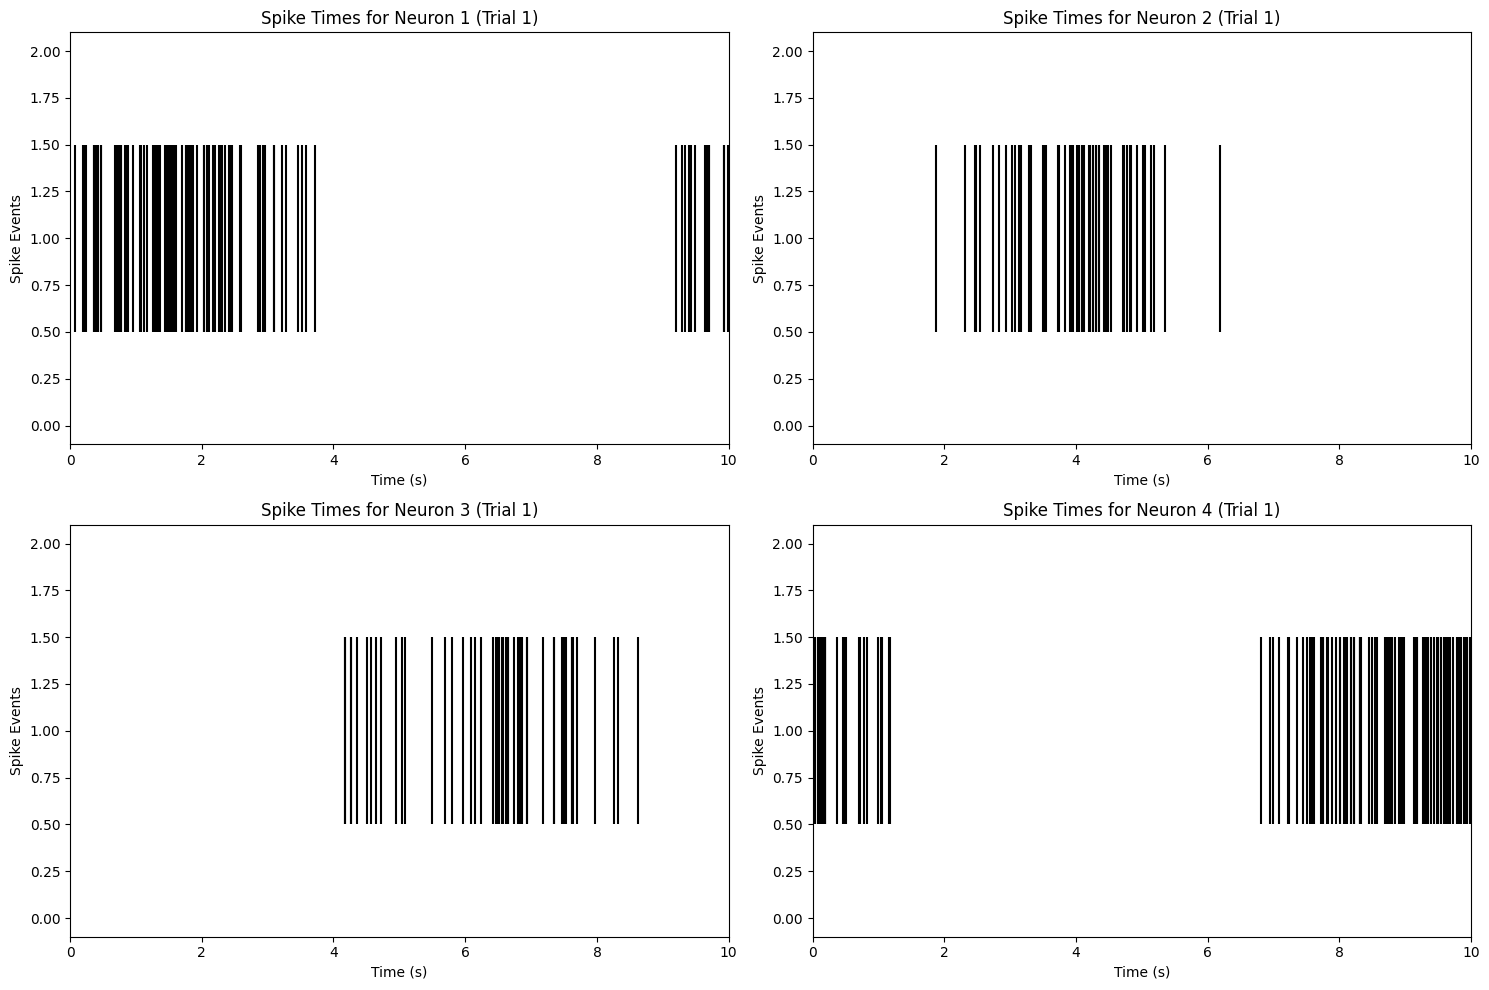

In [29]:
# Create subplots for spike trains of the first trials of all 4 neurons
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
neuron_names = ['Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4']

for i, ax in enumerate(axes.flatten()):
    ax.eventplot(neurons_all_spike_times[i][0], orientation='horizontal', color='black')
    ax.set_title(f'Spike Times for {neuron_names[i]} (Trial 1)')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Spike Events')
    ax.set_xlim(0, 10)  # Set x-axis limits to match the stimulus duration
    ax.grid(False)

plt.tight_layout()
plt.show()

In [26]:
spike_counts_neuron1 = [len(trial_spikes) for trial_spikes in neuron1_all_spike_times]
spike_counts_neuron2 = [len(trial_spikes) for trial_spikes in neuron2_all_spike_times]
spike_counts_neuron3 = [len(trial_spikes) for trial_spikes in neuron3_all_spike_times]
spike_counts_neuron4 = [len(trial_spikes) for trial_spikes in neuron4_all_spike_times]

# Computing the Fano-Factor for each neuron
fano_factor_neuron1 = np.var(spike_counts_neuron1) / np.mean(spike_counts_neuron1)
fano_factor_neuron2 = np.var(spike_counts_neuron2) / np.mean(spike_counts_neuron2)
fano_factor_neuron3 = np.var(spike_counts_neuron3) / np.mean(spike_counts_neuron3)
fano_factor_neuron4 = np.var(spike_counts_neuron4) / np.mean(spike_counts_neuron4)

print("Fano Factor for Neuron 1: ", fano_factor_neuron1)
print("Fano Factor for Neuron 2: ", fano_factor_neuron2)
print("Fano Factor for Neuron 3: ", fano_factor_neuron3)
print("Fano Factor for Neuron 4: ", fano_factor_neuron4)




Fano Factor for Neuron 1:  0.8440539468464895
Fano Factor for Neuron 2:  1.179875169198376
Fano Factor for Neuron 3:  1.1071131879543095
Fano Factor for Neuron 4:  1.0627421046498078


### ISI Distribution

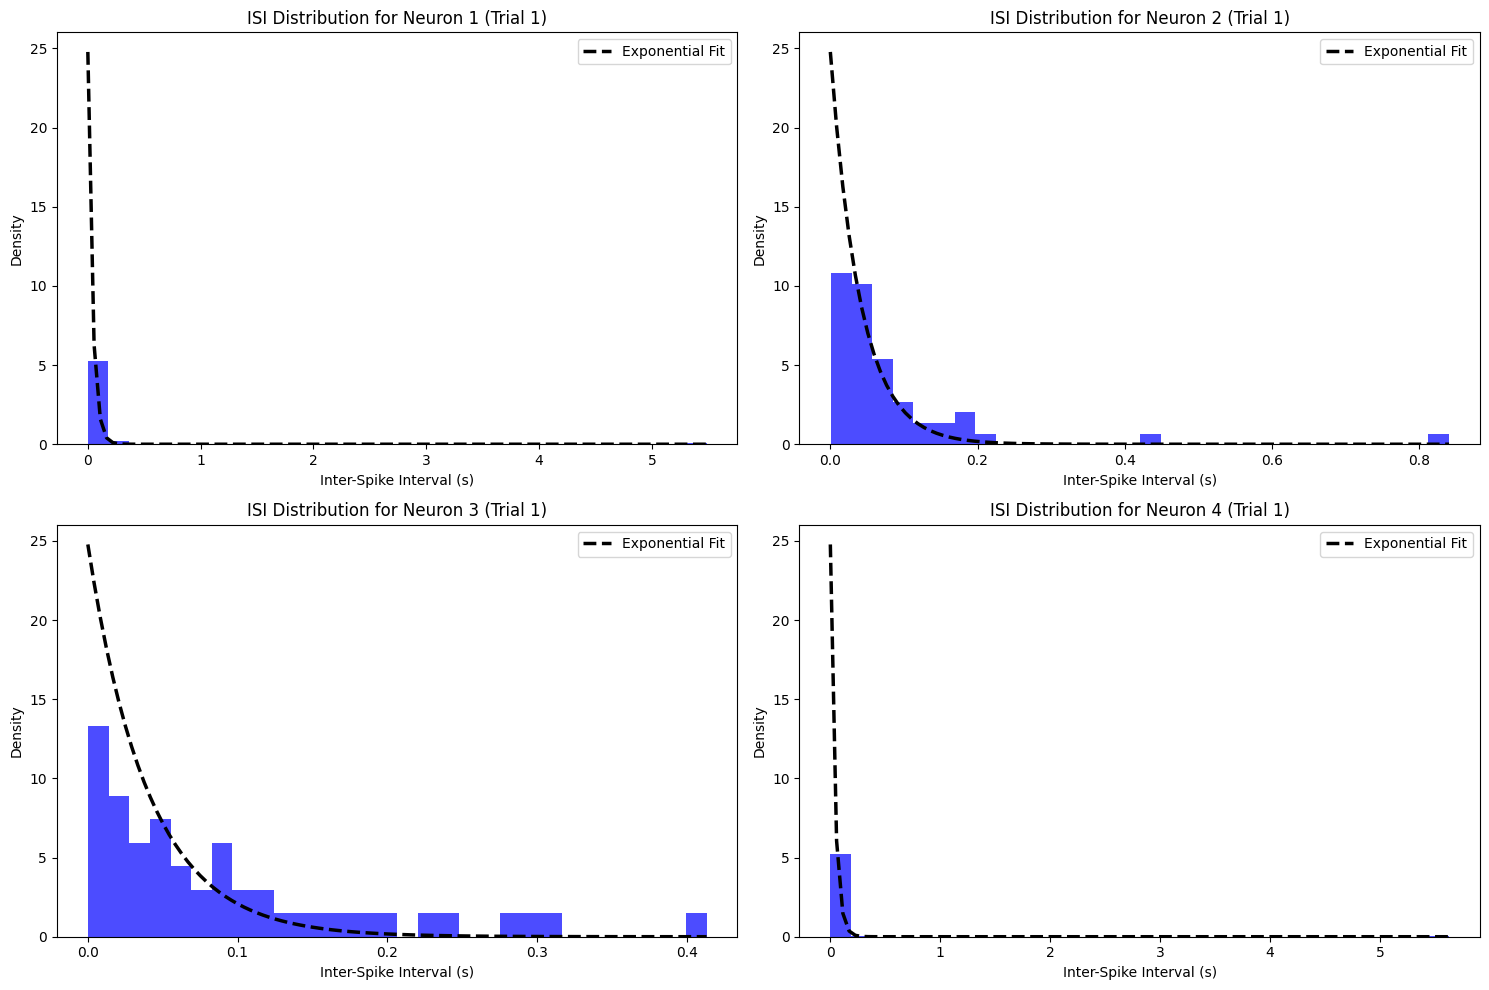

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    neuron_isi_trial1 = np.diff(neurons_all_spike_times[i][0])  # ISI for Neuron i+1, Trial 1
    ax.hist(neuron_isi_trial1, bins=30, density=True, alpha=0.7, color='blue')
    
    # Fit an exponential distribution to the ISI data
    lambda_estimate = np.mean([neurons_all_max_rate[j][0] for j in range(4)])  # Mean of the first row of all neurons
    x_values = np.linspace(0, max(neuron_isi_trial1), 100)
    exponential_pdf = lambda_estimate * np.exp(-lambda_estimate * x_values)
    
    # Overlay the exponential curve
    ax.plot(x_values, exponential_pdf, '--k', linewidth=2.5, label='Exponential Fit')
    
    ax.set_title(f'ISI Distribution for Neuron {i+1} (Trial 1)')
    ax.set_xlabel('Inter-Spike Interval (s)')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(False)

plt.tight_layout()
plt.show()

### Spike Count Distribution

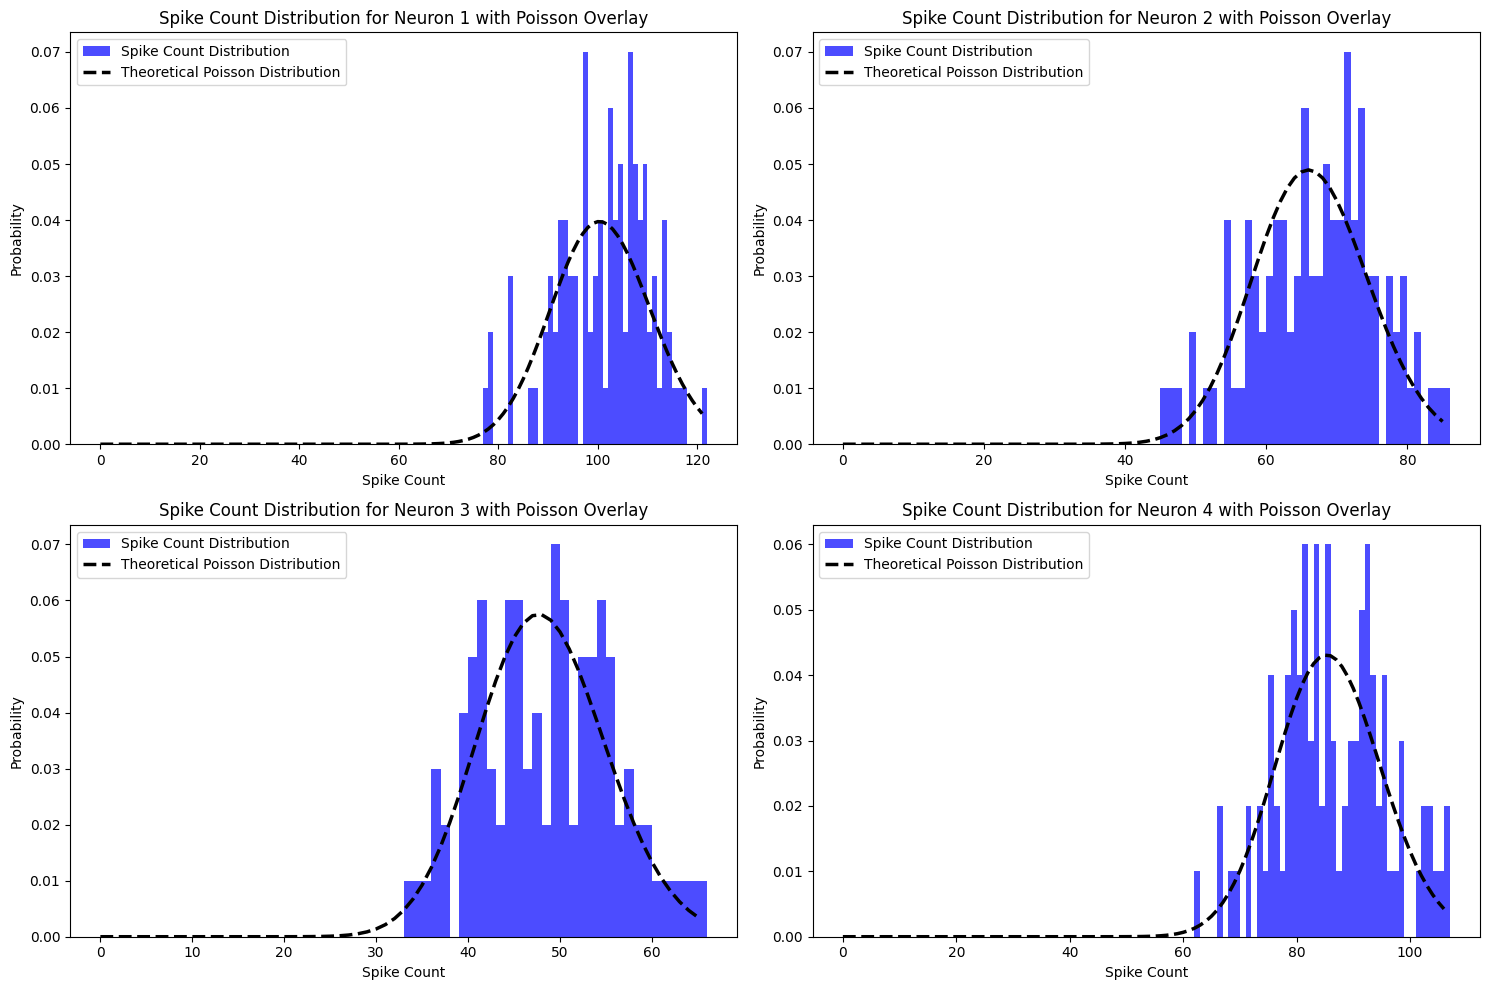

In [32]:
from scipy.stats import poisson
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
spike_counts_all_neurons = [spike_counts_neuron1, spike_counts_neuron2, spike_counts_neuron3, spike_counts_neuron4]

for i, ax in enumerate(axes.flatten()):
    spike_counts = spike_counts_all_neurons[i]
    mean_spike_count = np.mean(spike_counts)
    
    # Generate the theoretical Poisson distribution
    x_values = np.arange(0, max(spike_counts) + 1)
    poisson_pmf = poisson.pmf(x_values, mean_spike_count)
    
    # Plot the histogram of spike counts
    ax.hist(spike_counts, bins=range(0, max(spike_counts) + 2), density=True, alpha=0.7, color='blue', label='Spike Count Distribution')
    
    # Overlay the theoretical Poisson distribution
    ax.plot(x_values, poisson_pmf, '--k', linewidth=2.5, label='Theoretical Poisson Distribution')
    
    ax.set_title(f'Spike Count Distribution for Neuron {i+1} with Poisson Overlay')
    ax.set_xlabel('Spike Count')
    ax.set_ylabel('Probability')
    ax.legend()
    ax.grid(False)

plt.tight_layout()
plt.show()

### Raster Plots

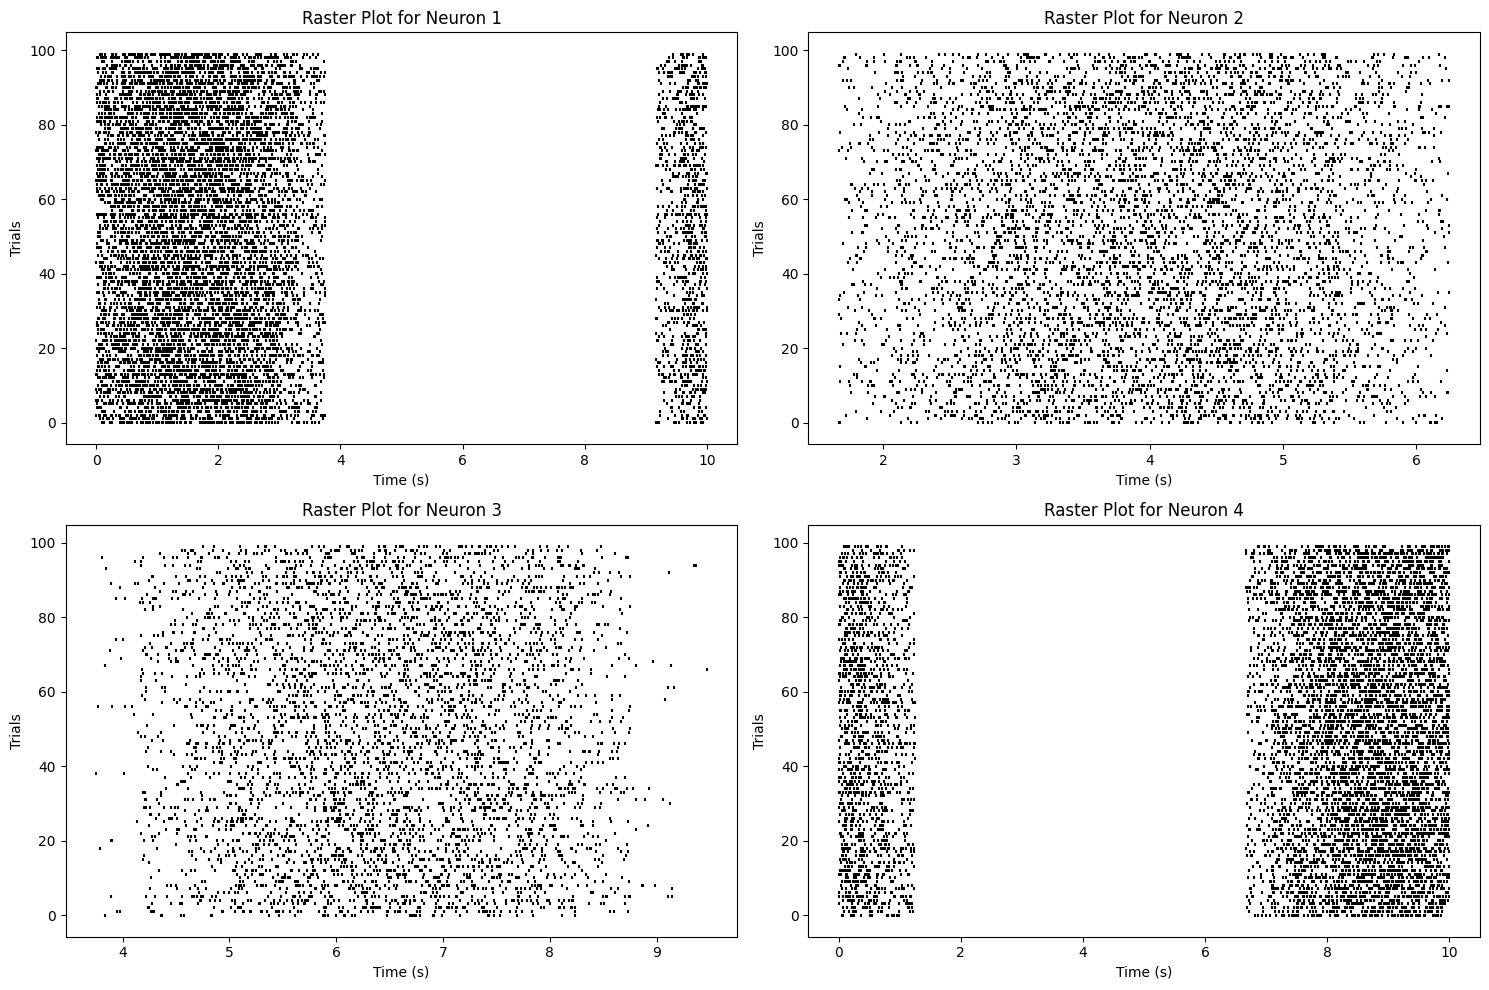

In [47]:
# Enumerate through all 4 neurons and create 4 raster plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
neuron_names = ['Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4']

for i, ax in enumerate(axes.flatten()):
    ax.eventplot(neurons_all_spike_times[i], colors='black', linelengths=0.8)
    ax.set_title(f'Raster Plot for {neuron_names[i]}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Trials')
    # for trial_spike_times in neurons_all_spike_times[i]:
    #     ax.vlines(trial_spike_times, i + 0.5, i + 1.5, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()